In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_masks.npy')

In [3]:
images.shape

(12311, 512, 512, 1)

In [4]:
images.nbytes

12909019136

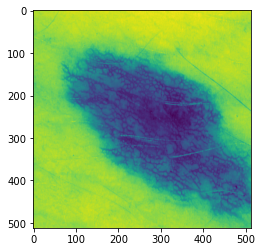

In [5]:
imshow(images[3])

In [6]:
masks.shape

(12311, 512, 512, 1)

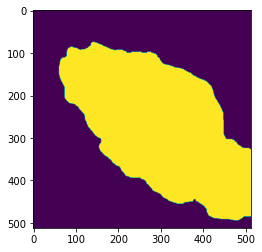

In [7]:
imshow(masks[3])

In [8]:
import sys
sys.path.append('../')
import gp2
from runner import Runner

In [9]:
from keras import losses

In [10]:
loss_fx = losses.BCE

In [11]:
R = Runner(verbose=True)

*** GP2 ***
Working directory: /tmp/tmpmb0hl0gyGP2
Verbose mode active!


In [12]:
C = gp2.KUC_UNet2D(loss=loss_fx, workingdir=R.workingdir)

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpmb0hl0gyGP2


In [13]:
R.classifier = C

In [14]:
R.run(images, masks, runs=4, batch_size=16)

Weights OK!
******
Loop 1
Epoch 1/100
39/39 [==============================] - 38s 766ms/step - loss: 0.4703 - dice_coeff: 0.5261 - val_loss: 0.5680 - val_dice_coeff: 0.3454
Epoch 2/100
39/39 [==============================] - 24s 623ms/step - loss: 0.3836 - dice_coeff: 0.5756 - val_loss: 1.6190 - val_dice_coeff: 0.0334
Epoch 3/100
39/39 [==============================] - 24s 624ms/step - loss: 0.3554 - dice_coeff: 0.5987 - val_loss: 5.9126 - val_dice_coeff: 0.5326
Epoch 4/100
39/39 [==============================] - 24s 629ms/step - loss: 0.3376 - dice_coeff: 0.6248 - val_loss: 3.0143 - val_dice_coeff: 6.8674e-04
Epoch 5/100
39/39 [==============================] - 25s 640ms/step - loss: 0.3264 - dice_coeff: 0.6372 - val_loss: 2.7358 - val_dice_coeff: 0.0010
Epoch 6/100
39/39 [==============================] - 24s 632ms/step - loss: 0.3248 - dice_coeff: 0.6344 - val_loss: 3.9762 - val_dice_coeff: 2.8058e-04
Epoch 7/100
39/39 [==============================] - 24s 629ms/step - loss: 0.

In [15]:
R.classifier_scores

[[0.7116203904151917, 0.7011792659759521],
 [0.39838021993637085, 0.7430142164230347],
 [0.30509957671165466, 0.7640510201454163],
 [3.3575384616851807, 0.5377560257911682]]

In [16]:
R.discriminator_scores

[[0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]

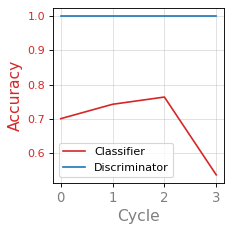

In [17]:
R.plot()

In [18]:
def visualize_predictions(model, images, masks, num_samples=100):
    for i in range(num_samples):
        x_val, y_val = images[i], masks[i]
        y_pred, _ = model.predict(x_val[np.newaxis, ...], y_val[np.newaxis, ...])

        # Draw the input image, true mask, and predicted mask
        fig, ax = plt.subplots(nrows=1, ncols=3)
        
        ax[0].imshow(x_val)
        ax[0].title.set_text('Input Image')

        ax[1].imshow(y_val.squeeze(), cmap='gray')
        ax[1].title.set_text('True Mask')

        ax[2].imshow(y_pred.squeeze(), cmap='gray')
        ax[2].title.set_text('Predicted Mask')

        plt.show()

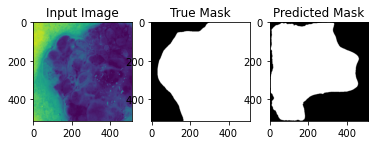

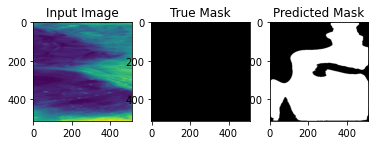

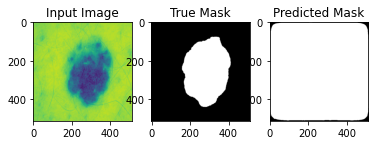

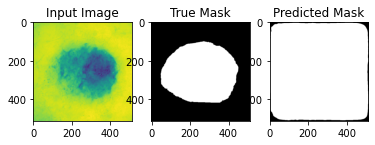

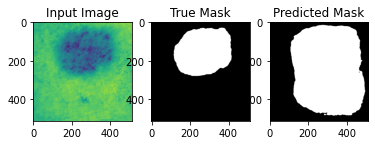

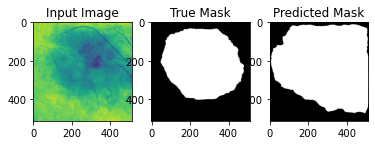

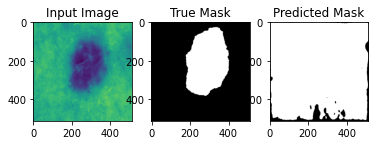

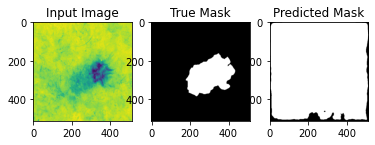

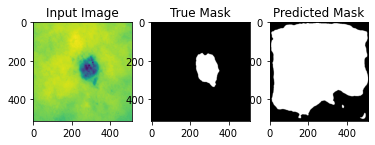

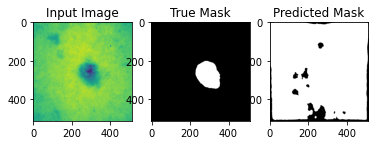

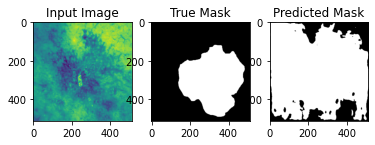

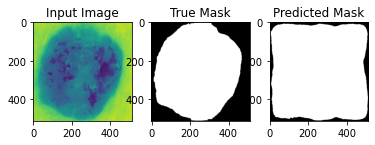

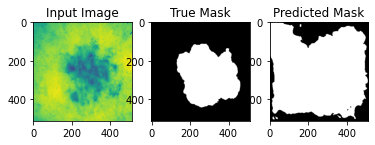

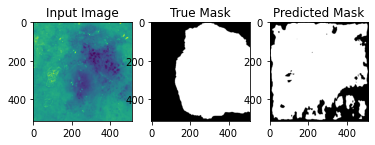

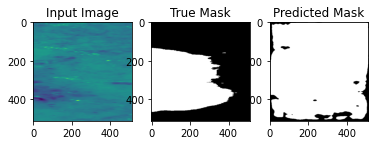

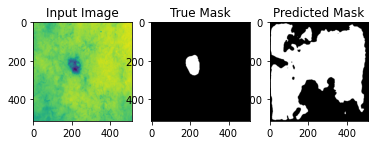

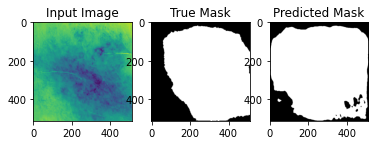

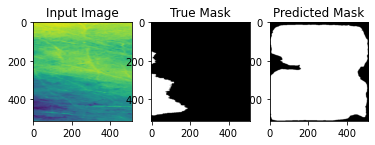

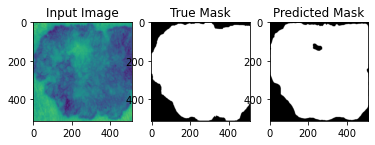

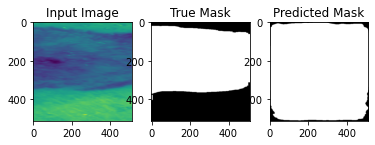

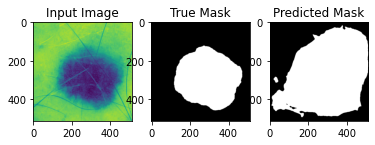

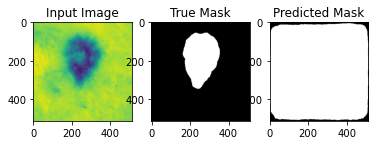

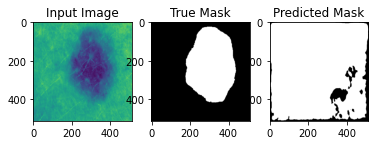

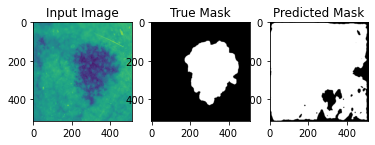

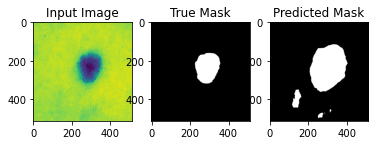

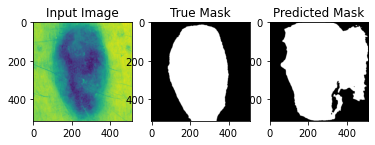

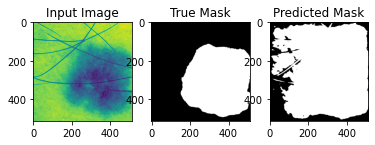

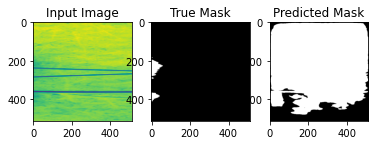

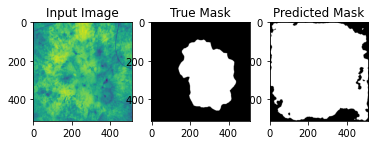

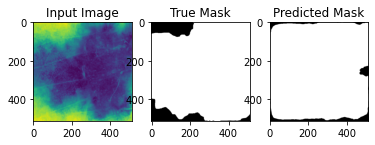

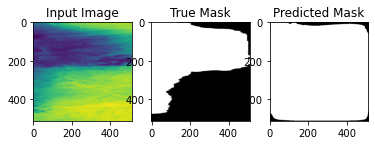

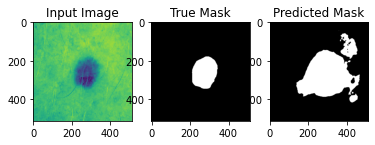

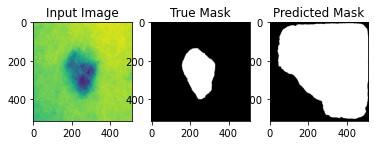

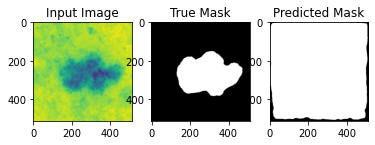

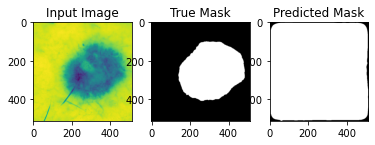

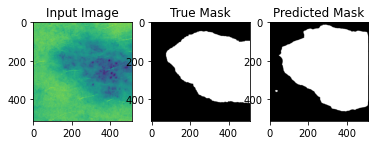

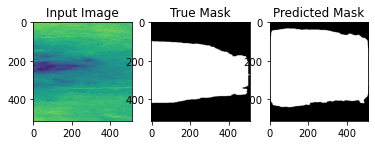

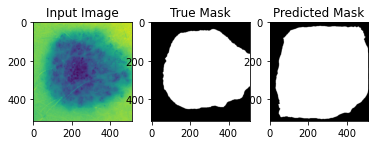

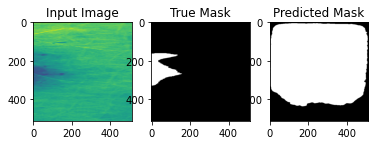

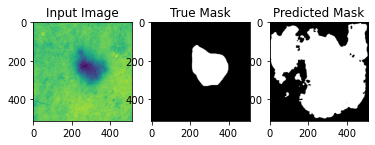

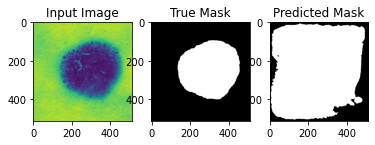

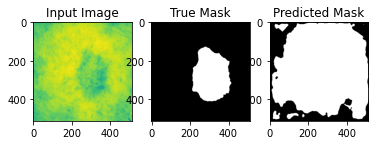

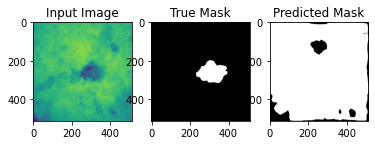

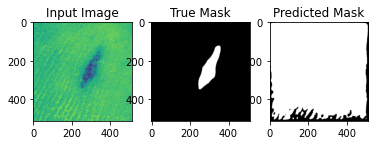

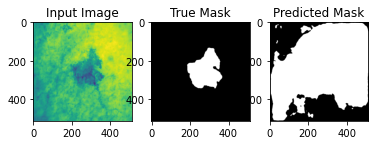

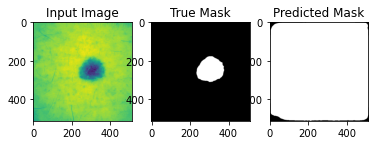

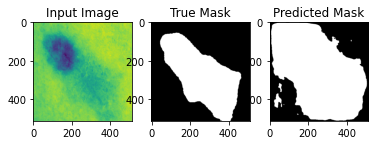

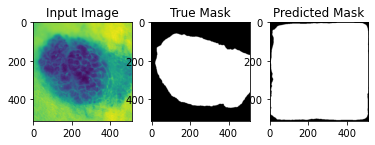

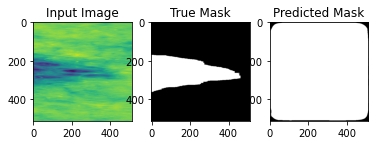

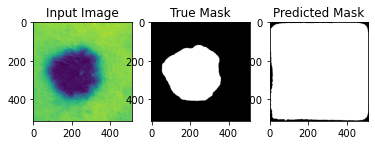

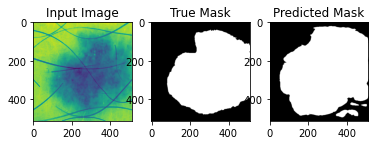

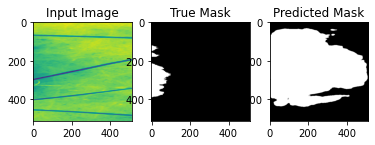

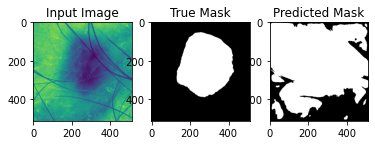

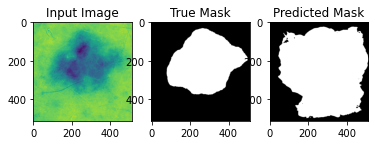

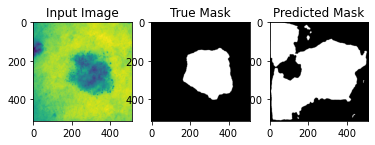

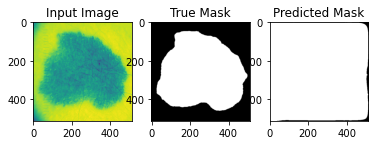

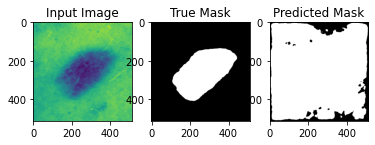

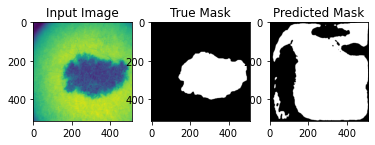

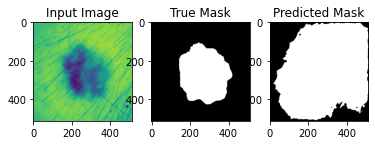

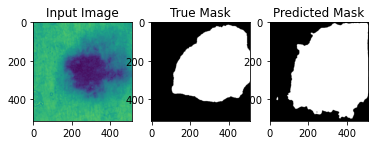

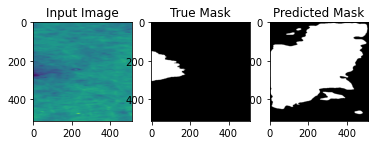

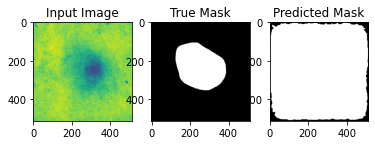

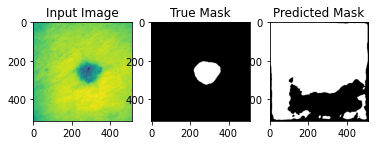

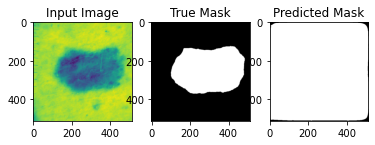

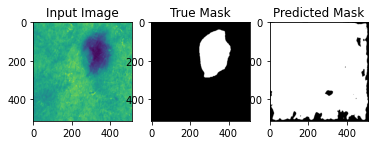

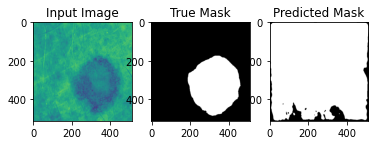

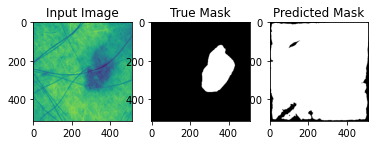

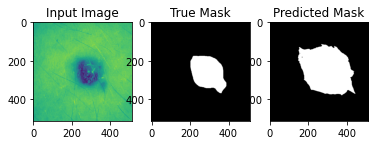

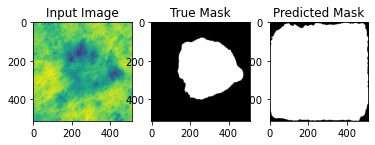

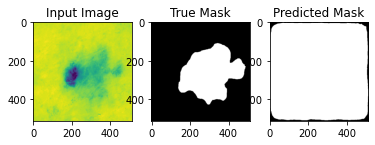

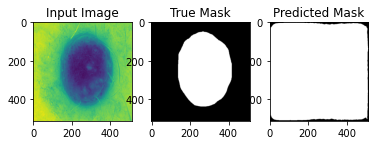

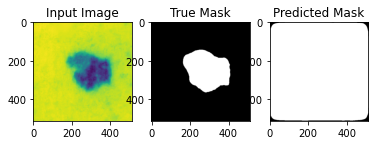

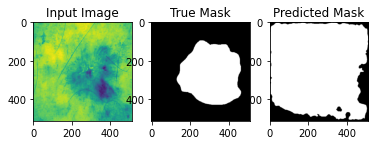

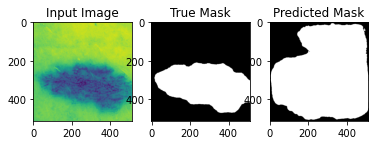

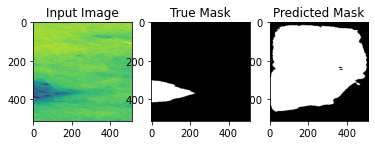

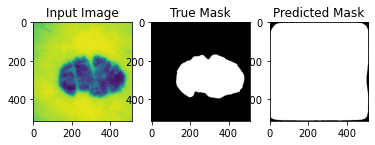

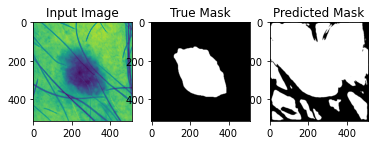

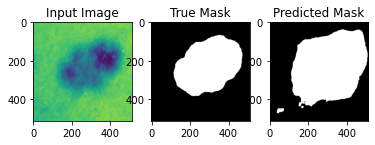

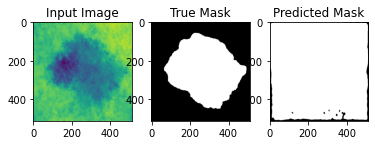

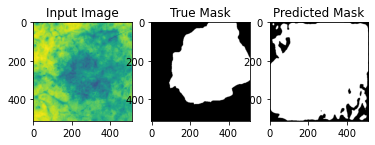

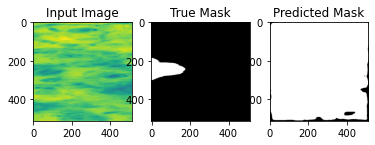

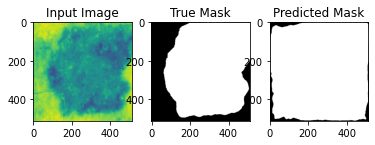

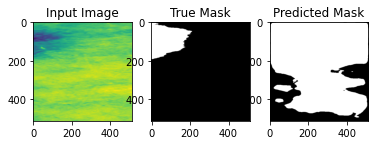

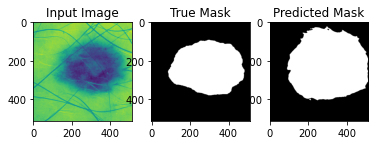

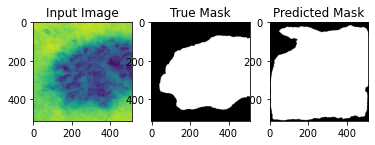

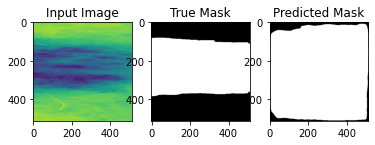

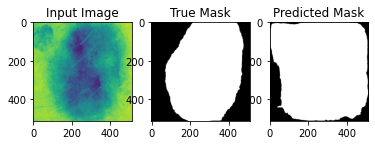

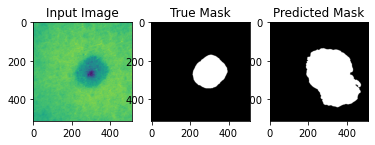

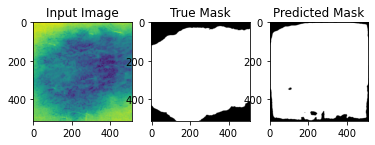

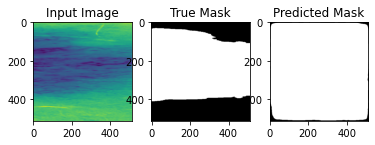

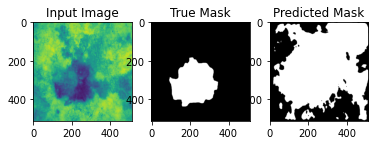

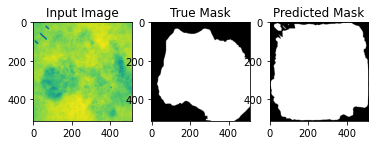

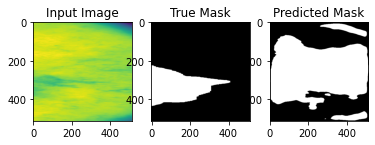

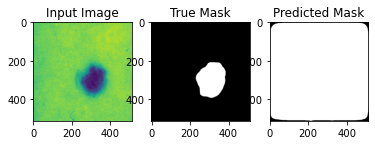

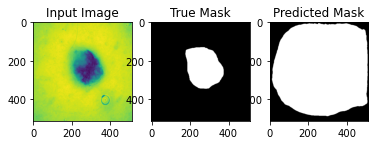

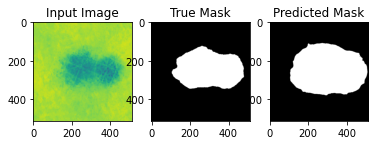

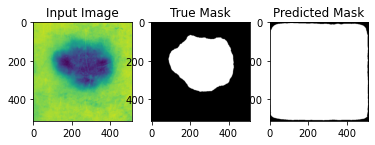

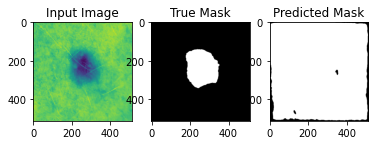

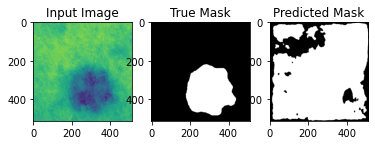

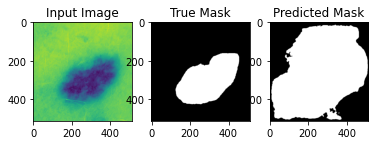

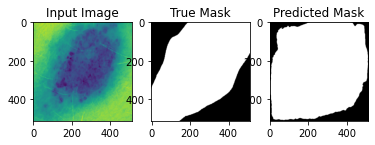

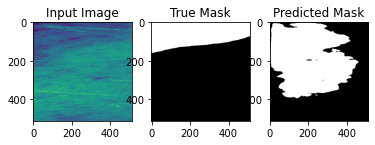

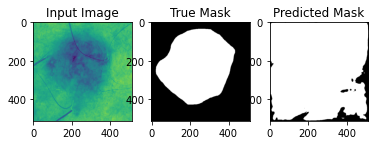

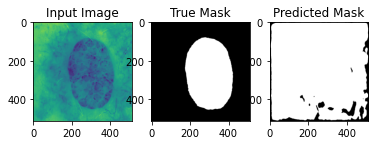

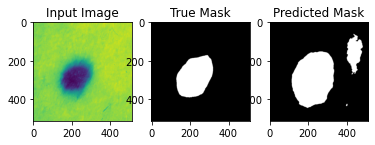

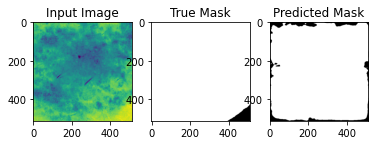

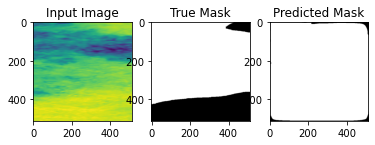

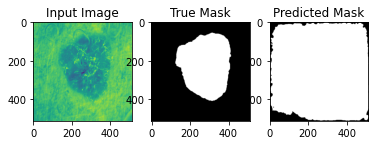

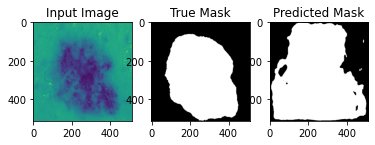

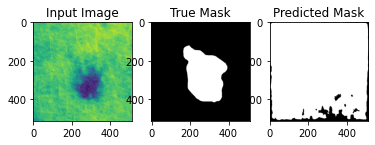

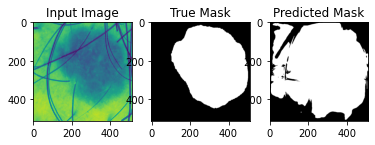

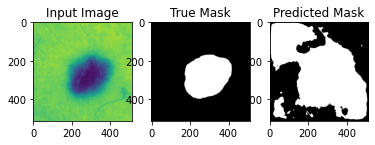

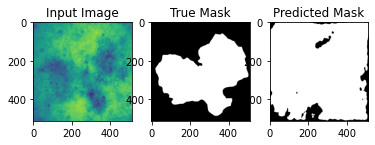

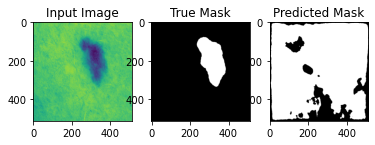

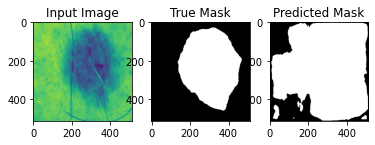

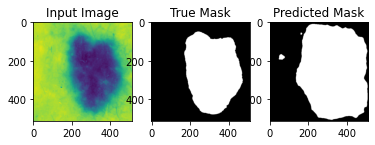

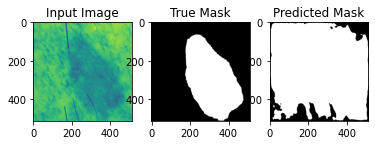

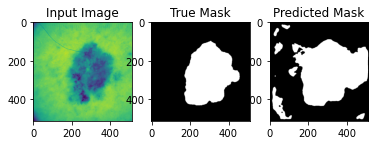

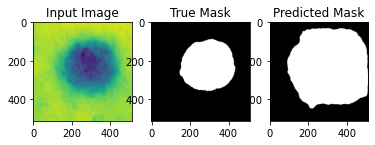

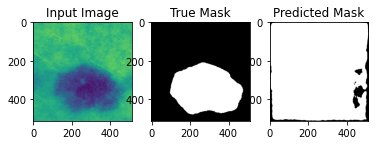

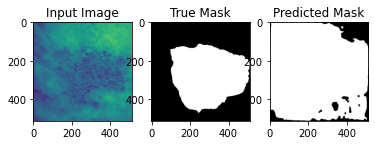

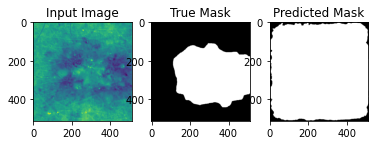

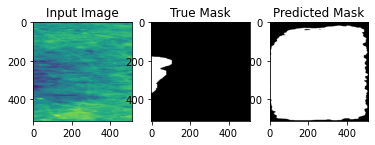

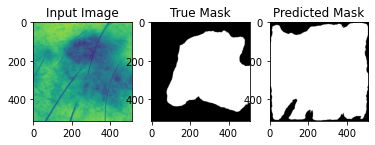

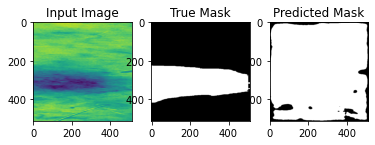

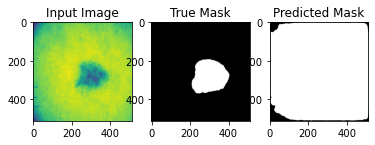

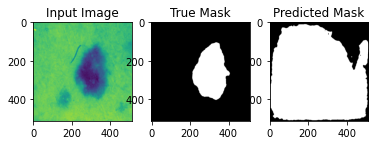

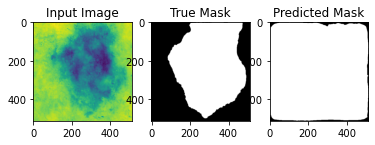

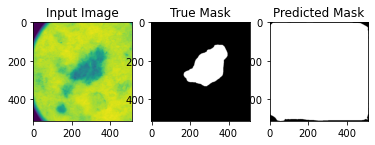

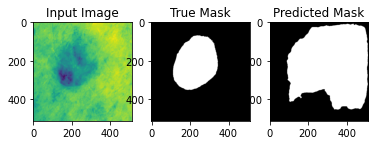

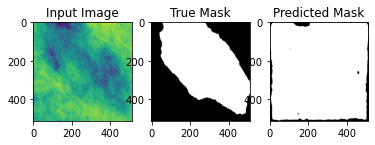

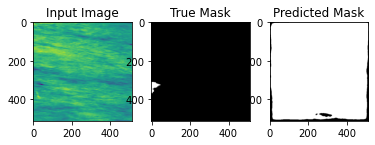

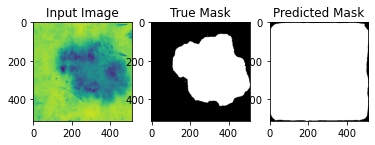

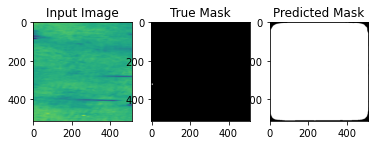

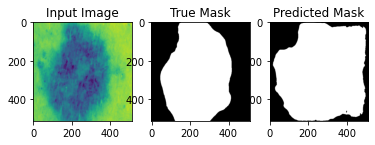

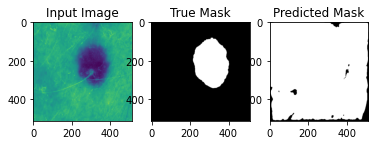

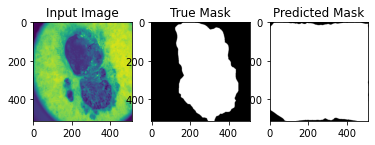

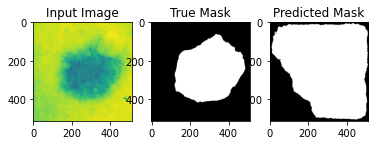

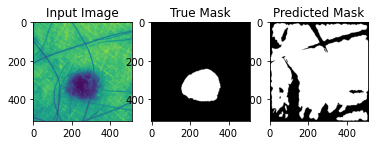

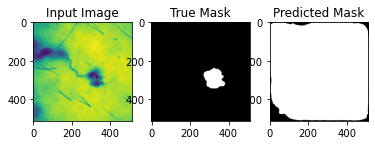

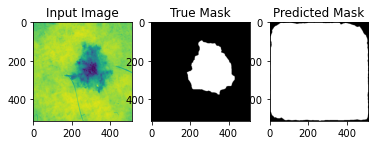

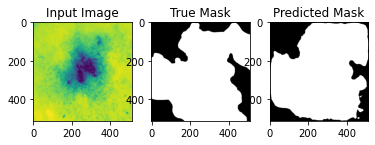

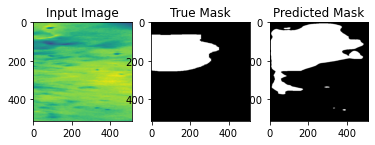

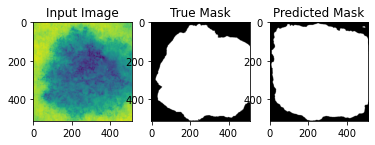

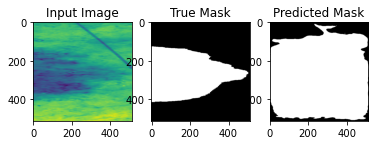

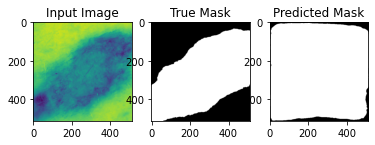

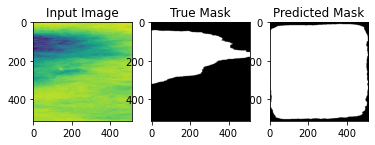

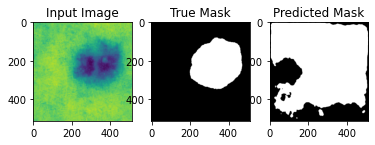

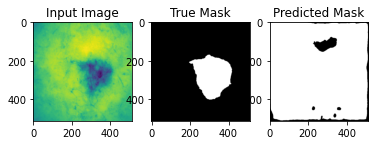

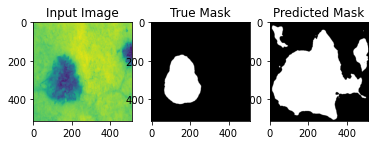

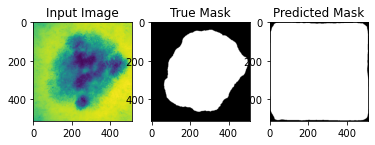

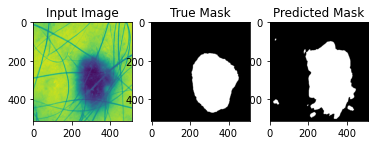

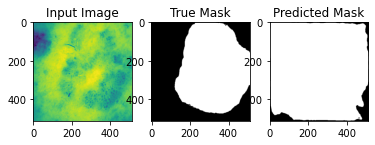

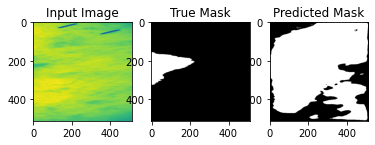

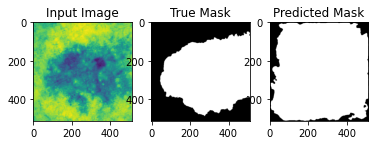

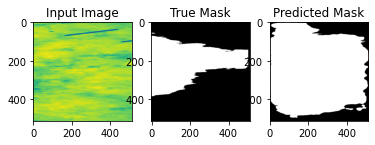

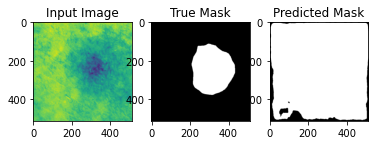

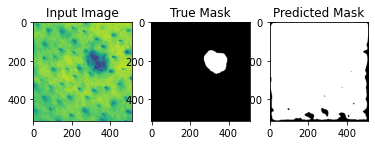

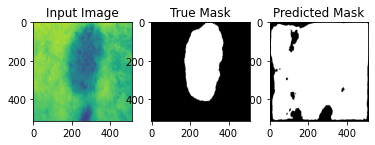

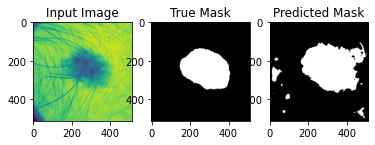

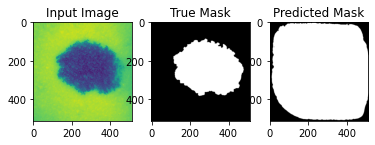

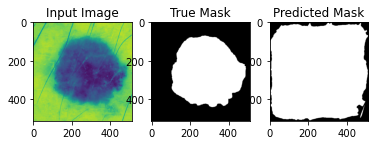

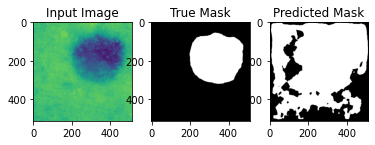

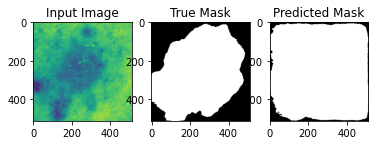

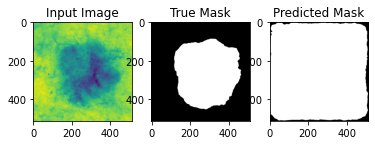

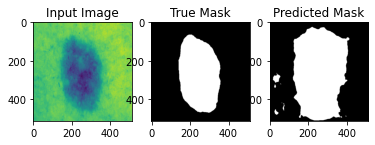

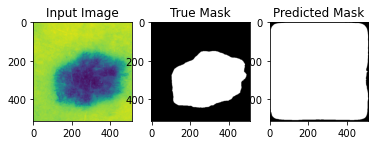

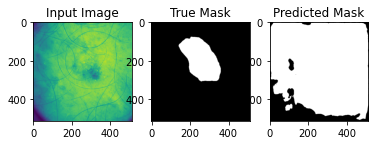

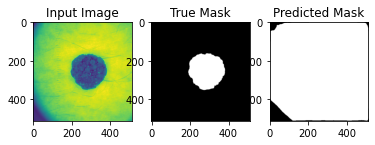

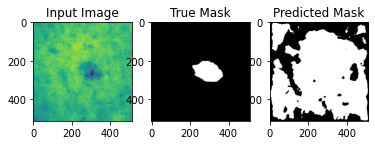

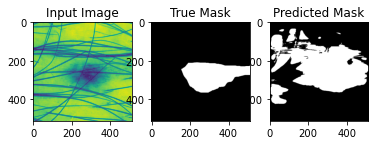

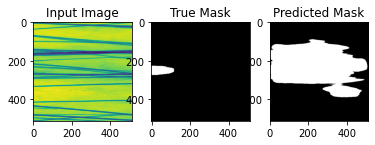

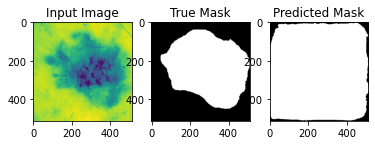

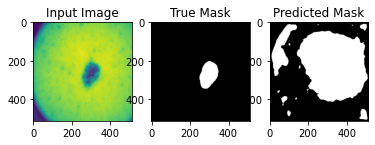

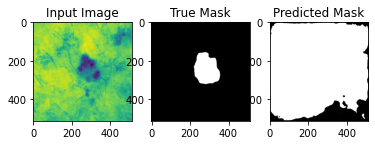

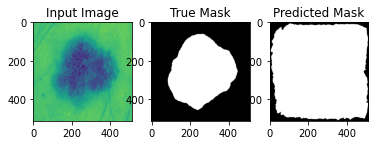

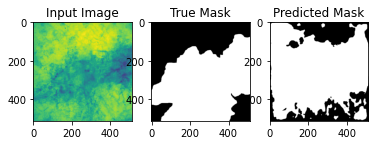

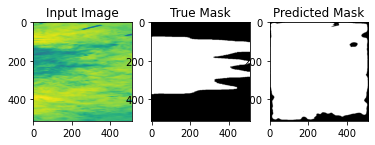

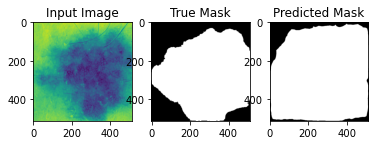

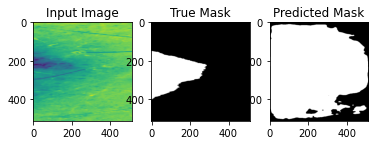

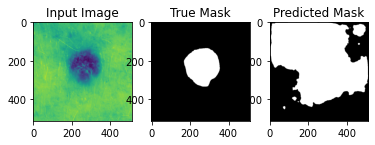

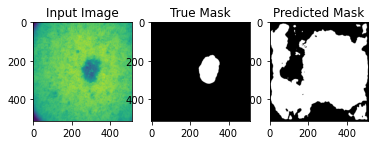

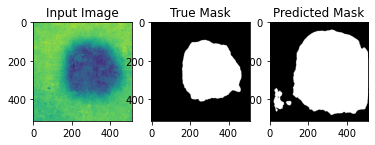

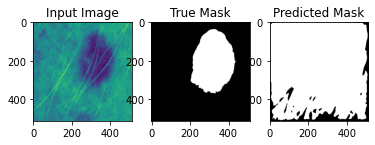

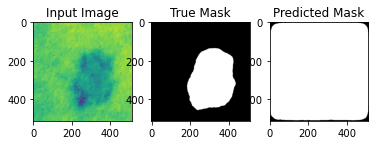

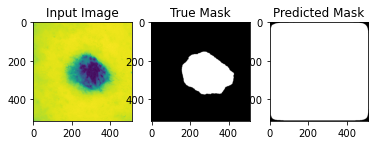

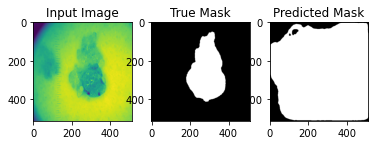

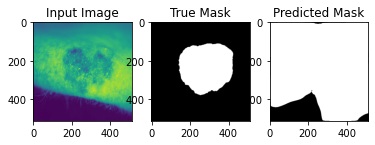

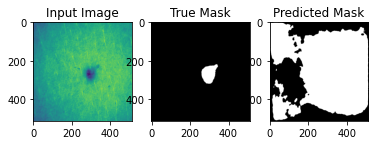

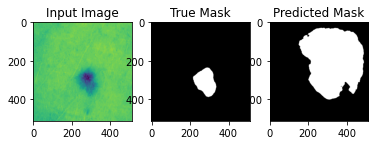

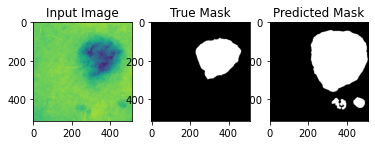

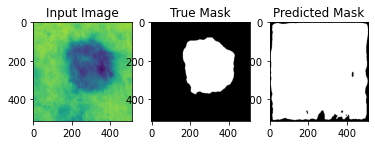

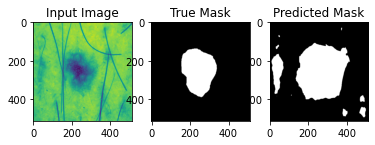

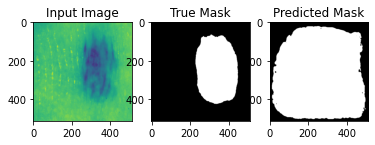

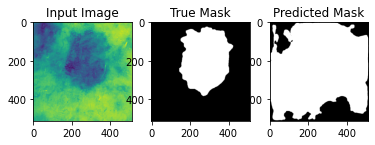

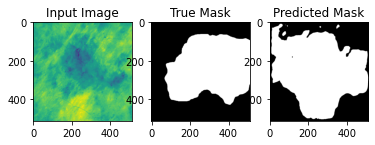

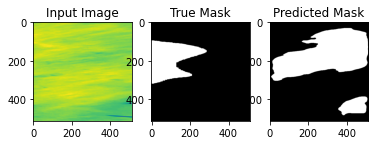

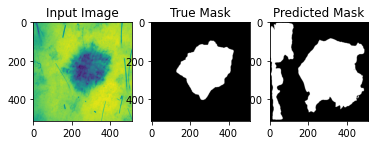

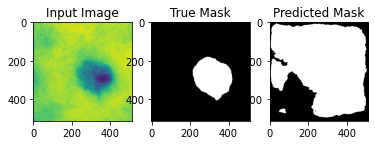

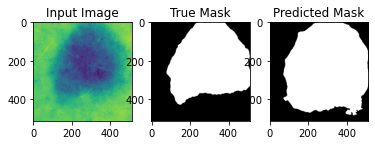

In [19]:
visualize_predictions(C, images[1000:1500], masks[1000:1500], num_samples=200)